In [52]:
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv("Sleep-Apnea-Sleep_health.csv")

In [54]:
print(df.head())

   Age Alcohol/Smoking Addiction BMI Category Blood Pressure  Daily Steps  \
0   56                        No       Normal         143/84         4200   
1   46                        No       Normal         112/67        10000   
2   32                        No       Normal         110/71        10000   
3   60                        No        Obese         140/90         3000   
4   25                        No       Normal         148/80         3000   

  Gender  Heart Rate            Occupation  Person ID  \
0   Male          77     Software Engineer          1   
1   Male          75                Doctor          2   
2   Male          75                Doctor          3   
3   Male          85  Sales Representative          4   
4   Male          85  Sales Representative          5   

   Physical Activity Level  Quality of Sleep  Screen Time  \
0                       42                 6          3.0   
1                       60                 6          5.0   
2          

In [55]:
# Show count of missing values in each column
print(df.isnull().sum())


Age                             0
Alcohol/Smoking Addiction       0
BMI Category                    0
Blood Pressure                  0
Daily Steps                     0
Gender                          0
Heart Rate                      0
Occupation                      0
Person ID                       0
Physical Activity Level         0
Quality of Sleep                0
Screen Time                     0
Screen Time (before Sleep)      0
Sleep Disorder                130
Sleep Duration                  0
Sleep Quality                   0
Sleep Walking                   0
Stress Level                    0
dtype: int64


In [56]:
# Replace actual NaN in 'Sleep Disorder' with string "None"
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')


In [57]:
print(df['Sleep Disorder'].isnull().sum())  # Should now be 0


0


In [58]:
# Split 'Blood Pressure' into 'Systolic' and 'Diastolic'
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert new columns to integers
df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)

# Optionally, drop the original 'Blood Pressure' column
df.drop('Blood Pressure', axis=1, inplace=True)


In [59]:
df.columns

Index(['Age', 'Alcohol/Smoking Addiction', 'BMI Category', 'Daily Steps',
       'Gender', 'Heart Rate', 'Occupation', 'Person ID',
       'Physical Activity Level', 'Quality of Sleep', 'Screen Time',
       'Screen Time (before Sleep)', 'Sleep Disorder', 'Sleep Duration',
       'Sleep Quality', 'Sleep Walking', 'Stress Level', 'Systolic',
       'Diastolic'],
      dtype='object')

In [60]:
df.head()

,Age,Alcohol/Smoking Addiction,BMI Category,Daily Steps,Gender,Heart Rate,Occupation,Person ID,Physical Activity Level,Quality of Sleep,Screen Time,Screen Time (before Sleep),Sleep Disorder,Sleep Duration,Sleep Quality,Sleep Walking,Stress Level,Systolic,Diastolic
0,56,No,Normal,4200,Male,77,Software Engineer,1,42,6,3.0,0,Restless Leg Syndrome,6.1,6.0,No,6,143,84
1,46,No,Normal,10000,Male,75,Doctor,2,60,6,5.0,1,CRSD,6.2,3.0,No,8,112,67
2,32,No,Normal,10000,Male,75,Doctor,3,60,6,2.0,4,None,6.2,8.0,No,4,110,71
3,60,No,Obese,3000,Male,85,Sales Representative,4,30,4,3.0,1,Sleep Apnea,3.0,4.0,No,7,140,90
4,25,No,Normal,3000,Male,85,Sales Representative,5,30,4,3.0,1,Restless Leg Syndrome,5.9,6.0,No,8,148,80


In [61]:
# Recreate the binary columns based on Sleep Disorder
df['Sleep Walking'] = df['Sleep Disorder'].apply(lambda x: 1 if x == 'Parasomnia' else 0)
df['Alcohol/Smoking Addiction'] = df['Sleep Disorder'].apply(lambda x: 1 if x == 'Insomnia' else 0)


# Preview the changes



In [62]:
 
# 1. Strip extra spaces from column names
df.columns = df.columns.str.strip()

# 2. Check if the required columns exist before encoding
to_encode = ['BMI Category', 'Sleep Disorder']
available_to_encode = [col for col in to_encode if col in df.columns]

# 3. One-hot encode available columns
if available_to_encode:
    df = pd.get_dummies(df, columns=available_to_encode, drop_first=True)

# 4. Convert any boolean columns (e.g., from get_dummies) to integers
bool_columns = df.select_dtypes(include='bool').columns.tolist()
df[bool_columns] = df[bool_columns].astype(int)


In [63]:
df.columns

Index(['Age', 'Alcohol/Smoking Addiction', 'Daily Steps', 'Gender',
       'Heart Rate', 'Occupation', 'Person ID', 'Physical Activity Level',
       'Quality of Sleep', 'Screen Time', 'Screen Time (before Sleep)',
       'Sleep Duration', 'Sleep Quality', 'Sleep Walking', 'Stress Level',
       'Systolic', 'Diastolic', 'BMI Category_Normal Weight',
       'BMI Category_Obese', 'BMI Category_Overweight',
       'Sleep Disorder_Insomnia', 'Sleep Disorder_None',
       'Sleep Disorder_Parasomnia', 'Sleep Disorder_Restless Leg Syndrome',
       'Sleep Disorder_Sleep Apnea'],
      dtype='object')

In [64]:
df.head()

,Age,Alcohol/Smoking Addiction,Daily Steps,Gender,Heart Rate,Occupation,Person ID,Physical Activity Level,Quality of Sleep,Screen Time,...,Systolic,Diastolic,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_None,Sleep Disorder_Parasomnia,Sleep Disorder_Restless Leg Syndrome,Sleep Disorder_Sleep Apnea
0,56,0,4200,Male,77,Software Engineer,1,42,6,3.0,...,143,84,0,0,0,0,0,0,1,0
1,46,0,10000,Male,75,Doctor,2,60,6,5.0,...,112,67,0,0,0,0,0,0,0,0
2,32,0,10000,Male,75,Doctor,3,60,6,2.0,...,110,71,0,0,0,0,1,0,0,0
3,60,0,3000,Male,85,Sales Representative,4,30,4,3.0,...,140,90,0,1,0,0,0,0,0,1
4,25,0,3000,Male,85,Sales Representative,5,30,4,3.0,...,148,80,0,0,0,0,0,0,1,0


In [65]:
from sklearn.preprocessing import StandardScaler

# List of numeric columns to scale
scale_cols = ['Screen Time', 'Sleep Duration', 'Stress Level', 'Systolic', 'Diastolic']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# Done! You can now check the scaled values like this:
print(df[scale_cols].head())


   Screen Time  Sleep Duration  Stress Level  Systolic  Diastolic
0     0.284094       -0.407601      0.283392  1.709030   0.543013
1     2.645232       -0.337319      1.251326 -0.979139  -1.410852
2    -0.896475       -0.337319     -0.684541 -1.152570  -0.951119
3     0.284094       -2.586362      0.767359  1.448885   1.232613
4     0.284094       -0.548167      1.251326  2.142606   0.083281


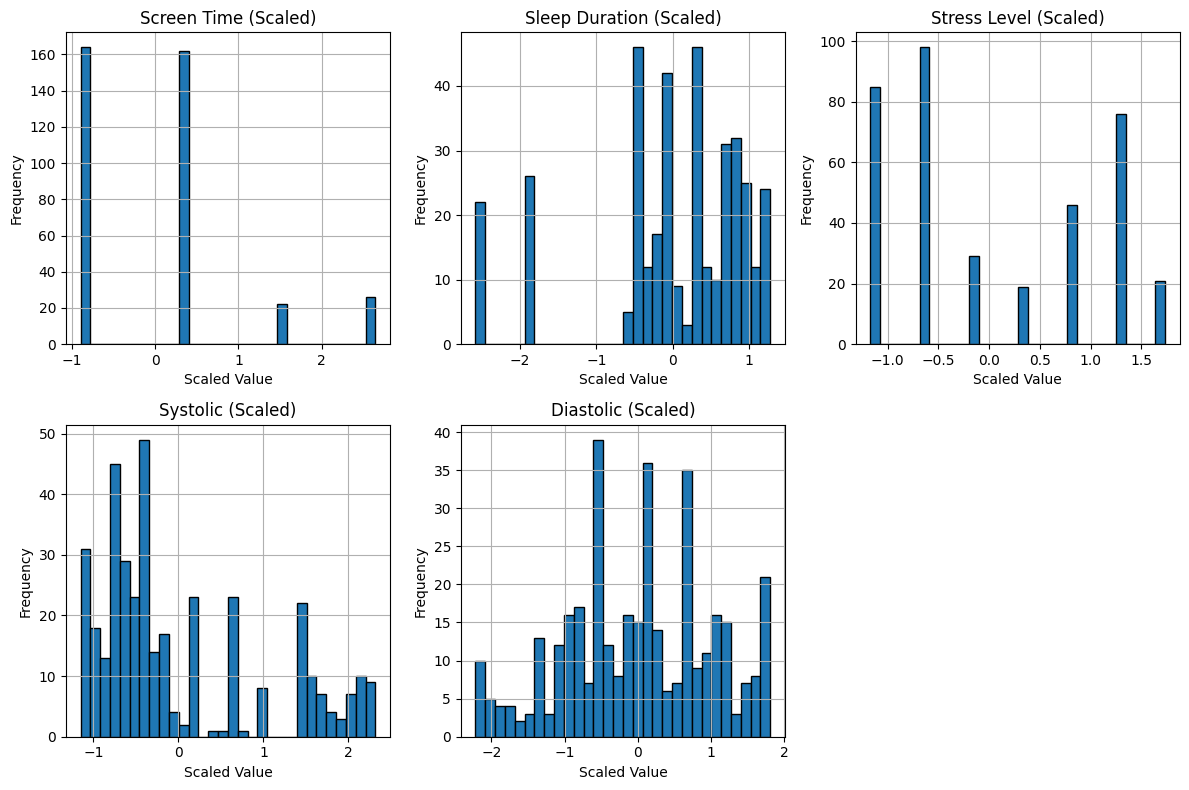

In [66]:

import matplotlib.pyplot as plt

# Plot histograms for the scaled columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(scale_cols):
    plt.subplot(2, 3, i + 1)
    df[col].hist(bins=30, edgecolor='black')
    plt.title(f'{col} (Scaled)')
    plt.xlabel('Scaled Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [68]:
from sklearn.model_selection import train_test_split

# Select target columns (all the one-hot encoded Sleep Disorder columns)
target_cols = [col for col in df.columns if col.startswith('Sleep Disorder_')]

# Features = everything else except those target columns
X = df.drop(columns=target_cols)
y = df[target_cols]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [69]:
print(df.columns.tolist())

['Age', 'Alcohol/Smoking Addiction', 'Daily Steps', 'Gender', 'Heart Rate', 'Occupation', 'Person ID', 'Physical Activity Level', 'Quality of Sleep', 'Screen Time', 'Screen Time (before Sleep)', 'Sleep Duration', 'Sleep Quality', 'Sleep Walking', 'Stress Level', 'Systolic', 'Diastolic', 'BMI Category_Normal Weight', 'BMI Category_Obese', 'BMI Category_Overweight', 'Sleep Disorder_Insomnia', 'Sleep Disorder_None', 'Sleep Disorder_Parasomnia', 'Sleep Disorder_Restless Leg Syndrome', 'Sleep Disorder_Sleep Apnea']


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  # Changed import
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib

# Assume df is your fully preprocessed DataFrame

# 1. Identify target columns (the one-hot encoded Sleep Disorder columns)
target_cols = [col for col in df.columns if col.startswith('Sleep Disorder_')]

# 2. Convert the one-hot encoded target to a single label
y = df[target_cols].idxmax(axis=1)
# Optional: Clean up labels if you want:
# y = y.str.replace('Sleep Disorder_', '')

# 3. Define features by dropping the one-hot target columns
X = df.drop(columns=target_cols)

# 4. Convert remaining categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# 5. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Split scaled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 7. Initialize models
logreg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=5)  # KNN with 5 neighbors

# 8. Train the models
logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)  # Train KNN

# 9.Save models to .pkl files
joblib.dump(logreg, 'logistic_regression_model.pkl')  # Logistic Regression
joblib.dump(knn, 'knn_model.pkl')  

# 10. Make predictions on the test set
logreg_preds = logreg.predict(X_test)
knn_preds = knn.predict(X_test)  # KNN predictions

# 11. Evaluate the models
print("=== Logistic Regression Report ===")
print(classification_report(y_test, logreg_preds))
print("Accuracy:", accuracy_score(y_test, logreg_preds))

print("\n=== KNN Report ===")  # Changed to KNN
print(classification_report(y_test, knn_preds))
print("Accuracy:", accuracy_score(y_test, knn_preds))


=== Logistic Regression Report ===
                                      precision    recall  f1-score   support

             Sleep Disorder_Insomnia       1.00      1.00      1.00        22
                 Sleep Disorder_None       1.00      1.00      1.00        19
           Sleep Disorder_Parasomnia       1.00      1.00      1.00        14
Sleep Disorder_Restless Leg Syndrome       1.00      1.00      1.00        10
          Sleep Disorder_Sleep Apnea       1.00      1.00      1.00        10

                            accuracy                           1.00        75
                           macro avg       1.00      1.00      1.00        75
                        weighted avg       1.00      1.00      1.00        75

Accuracy: 1.0

=== KNN Report ===
                                      precision    recall  f1-score   support

             Sleep Disorder_Insomnia       0.84      0.95      0.89        22
                 Sleep Disorder_None       0.70      1.00      0.83  

In [71]:
from sklearn.model_selection import cross_val_score

# Logistic Regression cross-validation
logreg_scores = cross_val_score(logreg, X_scaled, y, cv=5)
print("LogReg Cross-Validated Accuracy:", logreg_scores.mean())

# KNN cross-validation
knn_scores = cross_val_score(knn, X_scaled, y, cv=5)
print("KNN Cross-Validated Accuracy:", knn_scores.mean())

LogReg Cross-Validated Accuracy: 1.0
KNN Cross-Validated Accuracy: 0.8826666666666668


In [72]:
import numpy as np

y_shuffled = y.sample(frac=1.0, random_state=42)  # Shuffled target
logreg_scores = cross_val_score(logreg, X_scaled, y_shuffled, cv=5)
print("LogReg Accuracy with Shuffled Labels:", logreg_scores.mean())


LogReg Accuracy with Shuffled Labels: 0.22738738738738737


In [73]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


=== KNN Classification Report ===
                                      precision    recall  f1-score   support

             Sleep Disorder_Insomnia       0.88      0.95      0.91        22
                 Sleep Disorder_None       0.70      1.00      0.83        19
           Sleep Disorder_Parasomnia       0.88      0.50      0.64        14
Sleep Disorder_Restless Leg Syndrome       0.80      0.40      0.53        10
          Sleep Disorder_Sleep Apnea       0.73      0.80      0.76        10

                            accuracy                           0.79        75
                           macro avg       0.80      0.73      0.73        75
                        weighted avg       0.80      0.79      0.77        75



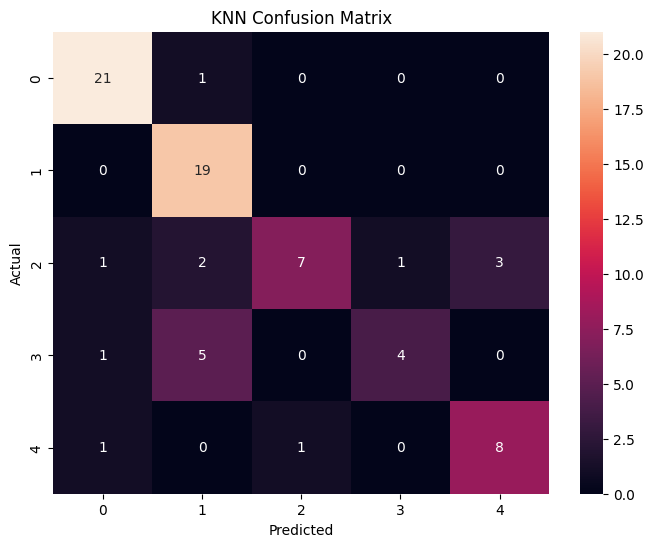

Accuracy: 0.7866666666666666


In [74]:
# First add these data preparation steps
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Prepare target (assuming your DataFrame is called df)
target_cols = [col for col in df.columns if col.startswith('Sleep Disorder_')]
y = df[target_cols].idxmax(axis=1)
X = df.drop(columns=target_cols)

# 2. Convert categorical features
X = pd.get_dummies(X, drop_first=True)

# 3. Split data BEFORE scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Scale features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now continue with your KNN code
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
knn_preds = knn.predict(X_test)
knn_probs = knn.predict_proba(X_test)

# Evaluation metrics
print("=== KNN Classification Report ===")
print(classification_report(y_test, knn_preds))

# Confusion Matrix
cm = confusion_matrix(y_test, knn_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Accuracy:", accuracy_score(y_test, knn_preds))

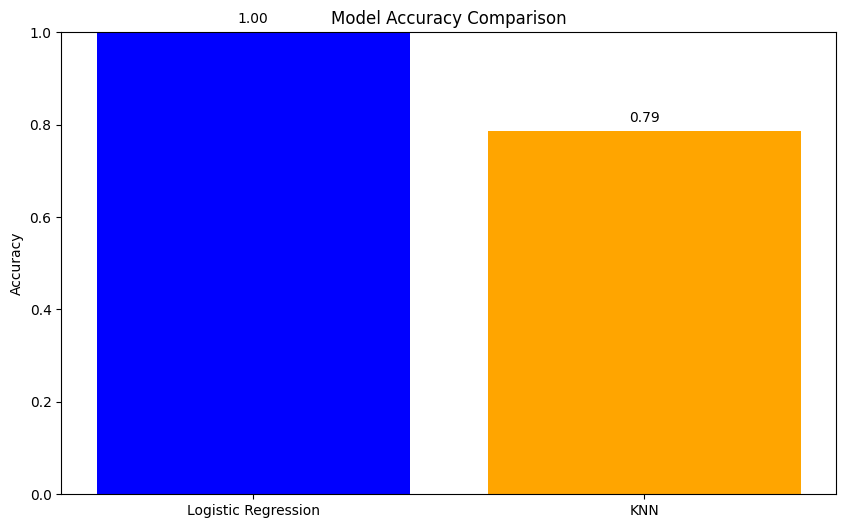

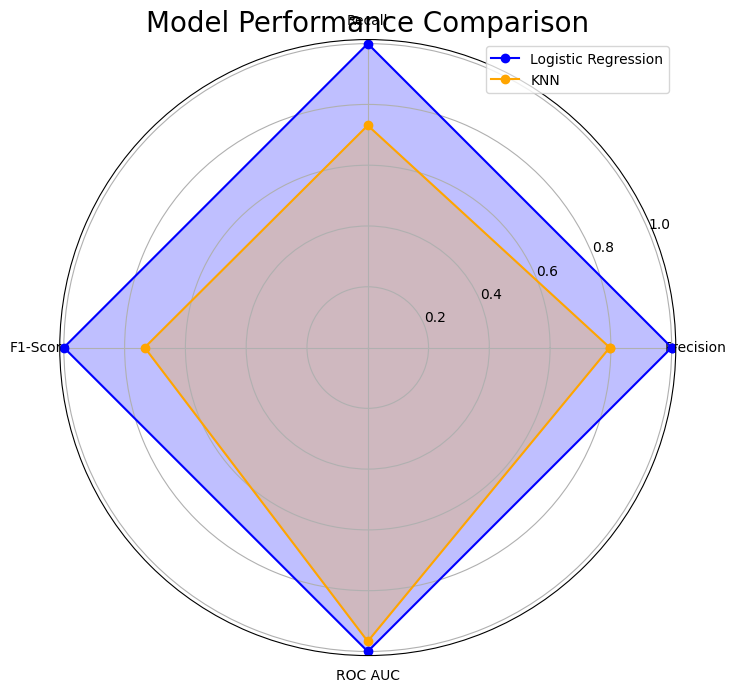

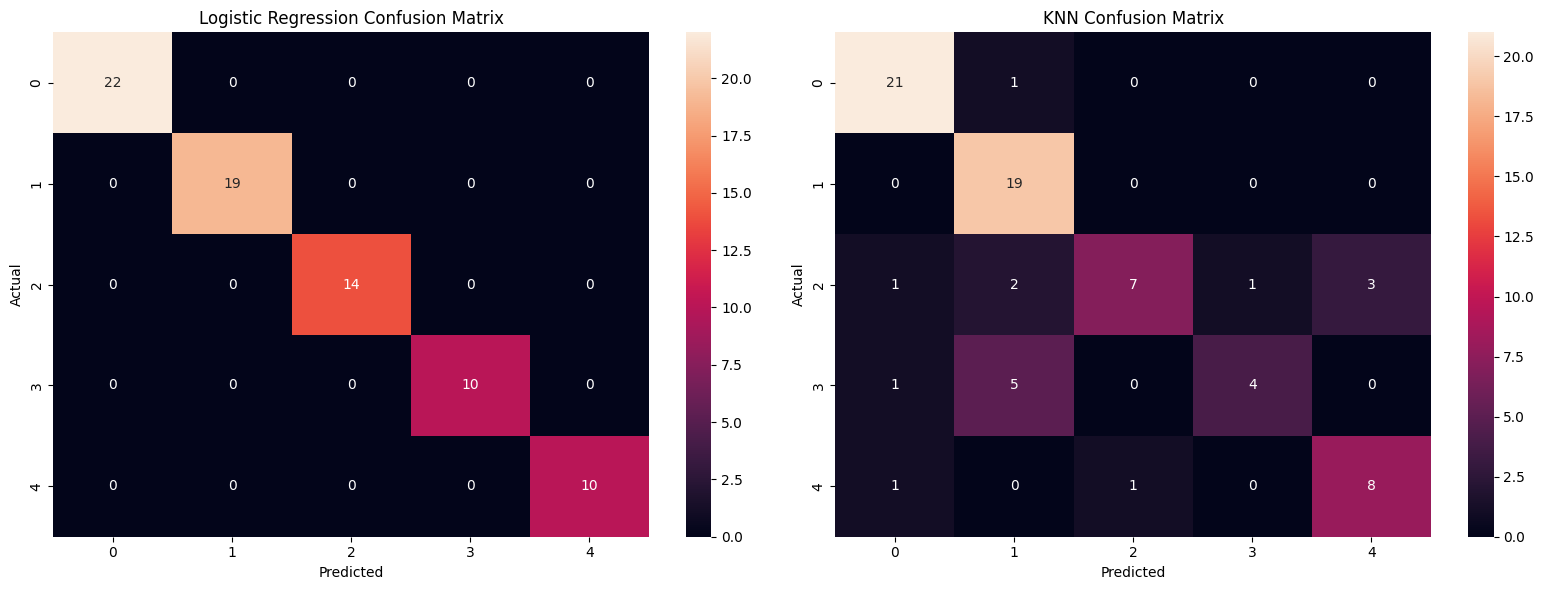

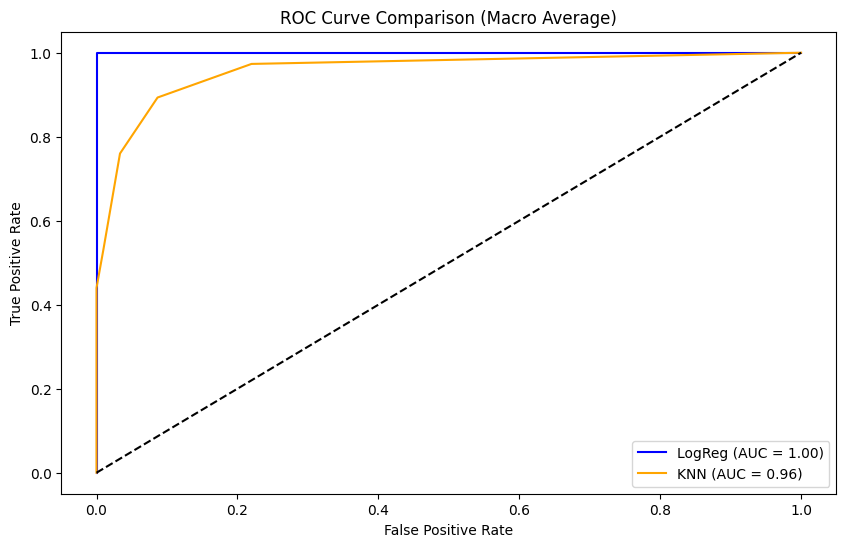

In [75]:
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc
)

# First ensure models are trained
logreg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=5)

logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Get predictions and probabilities
logreg_preds = logreg.predict(X_test)
knn_preds = knn.predict(X_test)
logreg_probs = logreg.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)

# 1. Accuracy Comparison Bar Chart
plt.figure(figsize=(10, 6))
models = ['Logistic Regression', 'KNN']
accuracies = [accuracy_score(y_test, logreg_preds), accuracy_score(y_test, knn_preds)]

plt.bar(models, accuracies, color=['blue', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

# 2. Metric Comparison Radar Chart
categories = ['Precision', 'Recall', 'F1-Score', 'ROC AUC']
logreg_metrics = [
    precision_score(y_test, logreg_preds, average='macro'),
    recall_score(y_test, logreg_preds, average='macro'),
    f1_score(y_test, logreg_preds, average='macro'),
    roc_auc_score(label_binarize(y_test, classes=logreg.classes_), logreg_probs, average='macro', multi_class='ovr')
]

knn_metrics = [
    precision_score(y_test, knn_preds, average='macro'),
    recall_score(y_test, knn_preds, average='macro'),
    f1_score(y_test, knn_preds, average='macro'),
    roc_auc_score(label_binarize(y_test, classes=knn.classes_), knn_probs, average='macro', multi_class='ovr')
]

angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

logreg_metrics += logreg_metrics[:1]
knn_metrics += knn_metrics[:1]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, logreg_metrics, 'o-', color='blue', label='Logistic Regression')
ax.plot(angles, knn_metrics, 'o-', color='orange', label='KNN')
ax.fill(angles, logreg_metrics, color='blue', alpha=0.25)
ax.fill(angles, knn_metrics, color='orange', alpha=0.25)
ax.set_xticks(angles[:-1])  # Exclude the repeated angle label
ax.set_xticklabels(categories)
ax.set_title('Model Performance Comparison', size=20)
plt.legend(loc='upper right')
plt.show()

# 3. Confusion Matrix Comparison
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Logistic Regression CM
sns.heatmap(confusion_matrix(y_test, logreg_preds), annot=True, fmt='d', ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# KNN CM
sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt='d', ax=ax[1])
ax[1].set_title('KNN Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# 4. ROC Curve Comparison (OvR macro-average)
y_test_bin = label_binarize(y_test, classes=logreg.classes_)

# Logistic Regression ROC
logreg_fpr, logreg_tpr, _ = roc_curve(y_test_bin.ravel(), logreg_probs.ravel())
logreg_roc_auc = auc(logreg_fpr, logreg_tpr)

# KNN ROC
knn_fpr, knn_tpr, _ = roc_curve(y_test_bin.ravel(), knn_probs.ravel())
knn_roc_auc = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(10, 6))
plt.plot(logreg_fpr, logreg_tpr, color='blue', label=f'LogReg (AUC = {logreg_roc_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, color='orange', label=f'KNN (AUC = {knn_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Macro Average)')
plt.legend(loc='lower right')
plt.show()